In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ktm2.csv')

In [4]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [8]:
df.drop('ID',axis=1,inplace=True)

In [9]:
df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [10]:
lb = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' :
        df[col] = lb.fit_transform(df[col])
        

In [11]:
df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,1,0,0,1,1,0
1,27,0,1,2,4,3,1
2,39,0,3,0,1,2,0
3,20,0,3,1,4,2,0
4,29,1,2,0,1,1,1


In [12]:
x = df.drop('Response',axis=1)
y = df['Response']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [14]:
# Building Deep learning model

In [15]:
model = Sequential([Dense(500,activation='tanh',input_shape = (x.shape[1],)), #input_layer
                   Dense(1000,activation='sigmoid'),   #first hidden layer
                   Dense(2000,activation='sigmoid'),   #second hidden layer
                   Dense(1,activation='sigmoid')])        #output layer

In [16]:
model.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,epochs=30,batch_size= 100,validation_data=[x_test,y_test])

Epoch 1/30
11/11 [==============================] - 4s 158ms/step - loss: 1.3657 - accuracy: 0.5358 - val_loss: 0.7862 - val_accuracy: 0.5768
Epoch 2/30
11/11 [==============================] - 1s 94ms/step - loss: 0.7374 - accuracy: 0.5226 - val_loss: 0.6651 - val_accuracy: 0.5768
Epoch 3/30
11/11 [==============================] - 1s 94ms/step - loss: 0.6953 - accuracy: 0.5932 - val_loss: 0.6678 - val_accuracy: 0.5570
Epoch 4/30
11/11 [==============================] - 1s 102ms/step - loss: 0.6401 - accuracy: 0.6073 - val_loss: 0.6105 - val_accuracy: 0.5768
Epoch 5/30
11/11 [==============================] - 1s 95ms/step - loss: 0.5586 - accuracy: 0.6930 - val_loss: 0.5154 - val_accuracy: 0.7654
Epoch 6/30
11/11 [==============================] - 1s 88ms/step - loss: 0.5139 - accuracy: 0.7684 - val_loss: 0.5222 - val_accuracy: 0.7610
Epoch 7/30
11/11 [==============================] - 1s 85ms/step - loss: 0.5028 - accuracy: 0.7750 - val_loss: 0.5264 - val_accuracy: 0.7566
Epoch 8/30


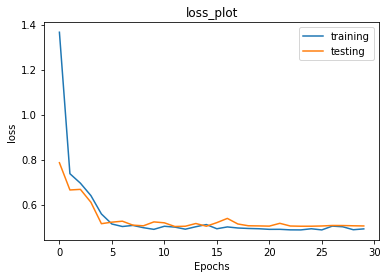

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss_plot')
plt.legend(['training','testing'])

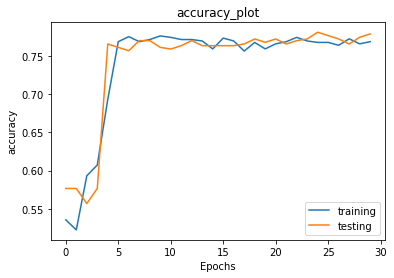

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('accuracy_plot')
plt.legend(['training','testing'])